EDA and Preprocessing
1. Data Exploration
Explore the data, list down the unique values in each feature and find its length.
Perform the statistical analysis and renaming of the columns.


In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\JOJO\Downloads\Employee.csv")

# List unique values in each column and their lengths
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")
    print(f"Number of unique values in {column}: {len(unique_values)}\n")
    


Unique values in Company: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Number of unique values in Company: 7

Unique values in Age: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Number of unique values in Age: 30

Unique values in Salary: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Number of unique values in Salary: 41

Unique values in Place: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Number of unique values in Place: 12

Unique values in Country: ['India']
Number of unique values in Country: 1

Unique values in Gender: [0 1]
Number of unique values in Gender: 2



In [3]:
# Statistical summary for numerical columns
statistics = df.describe()
print(statistics)


              Age       Salary      Gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683    0.417654
min      0.000000  1089.000000    0.000000
25%     22.000000  3030.000000    0.000000
50%     32.500000  5000.000000    0.000000
75%     37.750000  8000.000000    0.000000
max     54.000000  9876.000000    1.000000


In [7]:


# Check the updated column names
print(df.columns)


Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')


Data Cleaning: (Score : 2)
Find the missing and inappropriate values, treat them appropriately.
Remove all duplicate rows.
Find the outliers.
Replace the value 0 in age as NaN
Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)


In [13]:
# 1. Find missing and inappropriate values
missing_values = df.isnull().sum()
inappropriate_values = df[df['Age'] < 0]  # Check for inappropriate values 

# 2. Remove duplicate rows
df_cleaned = df.drop_duplicates()

# 3. Find outliers in the 'age' column using IQR
Q1 = df_cleaned['Age'].quantile(0.25)
Q3 = df_cleaned['Age'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_cleaned[(df_cleaned['Age'] < (Q1 - 1.5 * IQR)) | (df_cleaned['Age'] > (Q3 + 1.5 * IQR))]

# 4. Replace 0 in 'age' column with NaN
df_cleaned['Age'] = df_cleaned['Age'].replace(0, pd.NA)

# 5. missing values
df_cleaned['Age'].fillna(df_cleaned['Age'].mean(), inplace=True)  # Replace NaN in 'age' with mean
#  clean dataset
print(df_cleaned.head())


   Company   Age  Salary     Place Country  Gender
0      TCS  20.0     NaN   Chennai   India       0
1  Infosys  30.0     NaN    Mumbai   India       0
2      TCS  35.0  2300.0  Calcutta   India       0
3  Infosys  40.0  3000.0     Delhi   India       0
4      TCS  23.0  4000.0    Mumbai   India       0


C:\Users\JOJO\AppData\Local\Temp\ipykernel_18524\930176728.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Age'] = df_cleaned['Age'].replace(0, pd.NA)
C:\Users\JOJO\AppData\Local\Temp\ipykernel_18524\930176728.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean

Data Analysis: (Score : 2)
Filter the data with age >40 and salary<5000
Plot the chart with age and salary
Count the number of people from each place and represent it visually


Filtered Data (Age > 40 and Salary < 5000):
     Company   Age  Salary      Place Country  Gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


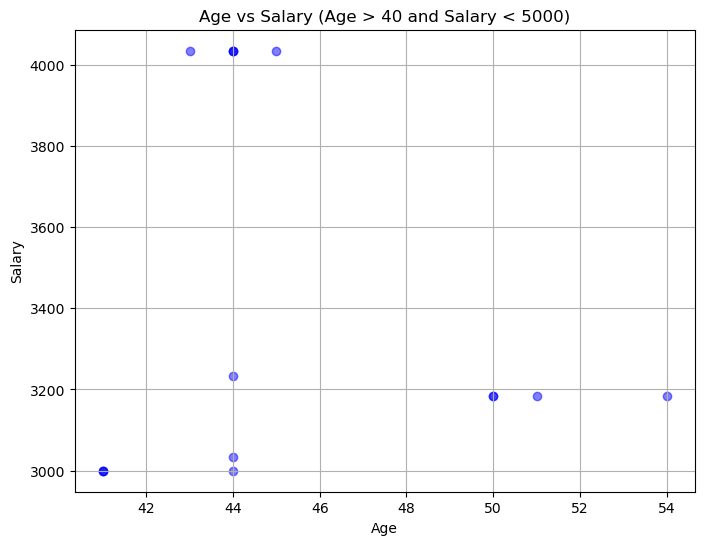

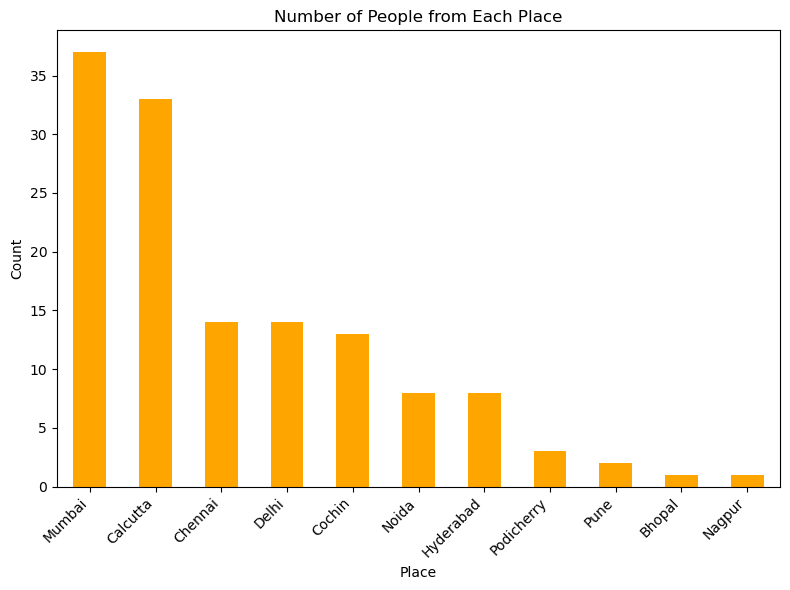

In [18]:

import matplotlib.pyplot as plt

# 1. Filter the data with age > 40 and salary < 5000
filtered_df = df[(df['Age'] > 40) & (df['Salary'] < 5000)]

# Display filtered data
print("Filtered Data (Age > 40 and Salary < 5000):")
print(filtered_df)

# 2. Plot the chart with age and salary
plt.figure(figsize=(8, 6))
plt.scatter(filtered_df['Age'], filtered_df['Salary'], color='blue', alpha=0.5)
plt.title("Age vs Salary (Age > 40 and Salary < 5000)")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.grid(True)
plt.show()

# 3. represent it visually
place_counts = df['Place'].value_counts()

# Plot the count of people from each place
plt.figure(figsize=(8, 6))
place_counts.plot(kind='bar', color='orange')
plt.title("Number of People from Each Place")
plt.xlabel("Place")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()


Data Encoding: (Score : 2)
Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.


In [27]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# 1. Apply label encoding to ordinal columns 
df['Company'] = label_encoder.fit_transform(df['Company'])

# 2. Apply one-hot encoding to nominal columns 
# Replace 'Gender' and 'Place' with your actual nominal columns
df_encoded = pd.get_dummies(df, columns=['Gender', 'Place'])

# Display the encoded dataset
print(df_encoded.head())



   Company   Age  Salary Country  Gender_0  Gender_1  Place_Bhopal  \
0        4  20.0      40   India      True     False         False   
1        2  30.0      40   India      True     False         False   
2        4  35.0       3   India      True     False         False   
3        2  40.0       5   India      True     False         False   
4        4  23.0      12   India      True     False         False   

   Place_Calcutta  Place_Chennai  Place_Cochin  Place_Delhi  Place_Hyderabad  \
0           False           True         False        False            False   
1           False          False         False        False            False   
2            True          False         False        False            False   
3           False          False         False         True            False   
4           False          False         False        False            False   

   Place_Mumbai  Place_Nagpur  Place_Noida  Place_Podicherry  Place_Pune  
0         False        

Feature Scaling: (Score : 2)
After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.


In [30]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler
# features to be scaled 
features_to_scale = ['Salary', 'Age']  

# 1. Applying StandardScaler
scaler_standard = StandardScaler()
df_encoded[features_to_scale] = scaler_standard.fit_transform(df_encoded[features_to_scale])

# 2. Applying MinMaxScaler
scaler_minmax = MinMaxScaler()
df_encoded[features_to_scale] = scaler_minmax.fit_transform(df_encoded[features_to_scale])

# Displaying the scaled dataset
print(df_encoded.head())


   Company       Age  Salary Country  Gender_0  Gender_1  Place_Bhopal  \
0        4  0.370370   1.000   India      True     False         False   
1        2  0.555556   1.000   India      True     False         False   
2        4  0.648148   0.075   India      True     False         False   
3        2  0.740741   0.125   India      True     False         False   
4        4  0.425926   0.300   India      True     False         False   

   Place_Calcutta  Place_Chennai  Place_Cochin  Place_Delhi  Place_Hyderabad  \
0           False           True         False        False            False   
1           False          False         False        False            False   
2            True          False         False        False            False   
3           False          False         False         True            False   
4           False          False         False        False            False   

   Place_Mumbai  Place_Nagpur  Place_Noida  Place_Podicherry  Place_Pune  